# Objective Day 1

## Objective

Create a function to scrape the Billboards 100 HOT songs and create local dataframe of songs with them including:

Song’s name

Song’s artist

## Importing Libraries <a class="anchor" id="day1libraries"></a>

In [1]:
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import requests

## Source <a class="anchor" id="day1source"></a>

In [2]:
url = "https://www.billboard.com/charts/hot-100"

In [9]:
response = requests.get(url)
#print(response.status_code) #200 is Succeess, 1xx Informational responses, 3xx is Redirection, 4xx is Client Errors, 5xx is Server errors

In [10]:
#Getting the html code for the website.
soup = BeautifulSoup(response.text, "html.parser") 

In [ ]:
#for tag in soup.select("span.chart-element__information"): #Path to the container that contains the required information. If there is a unique class name it will be enough.
#    print(tag.select("span.chart-element__information__song.text--truncate.color--primary")[0].get_text())
#    print(tag.select("span.chart-element__information__artist.text--truncate.color--secondary")[0].get_text())

## Code <a class="anchor" id="day1code"></a>


In [11]:
Song_Names = [tag.select("span.chart-element__information__song.text--truncate.color--primary")[0].get_text() for tag in soup.select("span.chart-element__information")]
#Song_Names
#List with song titles

In [12]:
Artist_Names = [elem.select("span.chart-element__information__artist.text--truncate.color--secondary")[0].get_text() for elem in soup.select("span.chart-element__information")]
#Artist_Names
#List with song artists

In [13]:
#Creating a dictionary with all the information
d = {"Artist_Names":Artist_Names, "Song_Names":Song_Names} 

In [14]:
#Converting the dictionary to a dataframe
df_100_charts = pd.DataFrame(data=d) 

In [15]:
df_100_charts

,Artist_Names,Song_Names
0,BTS,Butter
1,Olivia Rodrigo,Good 4 U
2,Dua Lipa Featuring DaBaby,Levitating
3,Justin Bieber Featuring Daniel Caesar & Giveon,Peaches
4,Silk Sonic (Bruno Mars & Anderson .Paak),Leave The Door Open
...,...,...
95,Lainey Wilson,Things A Man Oughta Know
96,Thomas Rhett,Country Again
97,Elle King & Miranda Lambert,Drunk (And I Don't Wanna Go Home)
98,Lil Baby & Lil Durk,If You Want To


------------------

# Objective Day 2



## Objective 1

* Create a second function to retrieve the audio features of a given song.


## Importing Libraries

In [16]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from Credentials import Client_ID, Client_Secret
import json
import requests
client_credentials_manager = SpotifyClientCredentials(client_id=Client_ID, client_secret=Client_Secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
import pprint
import pandas as pd
from time import sleep

## Audio features from one song

Create a second function to retrieve the audio features of a given song.

In [17]:
#Getting information about one song from spotify as a json file.
def get_all_information_about_song(song_name):
    song = sp.search(q=song_name, limit=1)
    return song
song = get_all_information_about_song("Butter")   
#song = sp.search(q='Butter', limit=1) 
song.keys()

dict_keys(['tracks'])

In [ ]:
#song #The json with the info about the song is a dictionary

In [18]:
song.keys()

dict_keys(['tracks'])

In [19]:
song.get("tracks").keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [20]:
#song['tracks']['items'][0]

In [21]:
song['tracks']['items'][0].keys() #This dictionary contains our wanted id/uri.

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [22]:
#pprint.pprint(song) #pprint is the pretty-printer library showing code in a prettier way.

The following code takes the information from the dict within a dict etc. until it gets the uri for the one song we chose above. The [0] shows that one part is a list and the first item on that list contains our information.

In [23]:
song['tracks']['items'][0]['uri']

'spotify:track:2bgTY4UwhfBYhGT4HUYStN'

Now we get the audiofeatures of our chosen song.

In [24]:
#The uri for the song.
song["tracks"]["items"][0]["uri"] 

'spotify:track:2bgTY4UwhfBYhGT4HUYStN'

In [25]:
audio_features = sp.audio_features(song["tracks"]["items"][0]["uri"])[0]
#audio_features     #The audio-features of the song are shown as a dictionary.

In [26]:
#audio_features.keys()

In [27]:
audio_features_new = { key: [audio_features[key]] for key in list(audio_features.keys()) }

In [28]:
pd.DataFrame(audio_features_new) #Dataframe with the audio features for our chosen song.

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.759,0.459,8,-5.187,1,0.0948,0.00323,0,0.0906,0.695,109.997,audio_features,2bgTY4UwhfBYhGT4HUYStN,spotify:track:2bgTY4UwhfBYhGT4HUYStN,https://api.spotify.com/v1/tracks/2bgTY4UwhfBY...,https://api.spotify.com/v1/audio-analysis/2bgT...,164442,4


--------------------------------

## Objective 2

* Create a third function to update the internal database with the song features using the previous function and to add this information to the dataframe:

    - Song’s url/ uri
    - Song’s audio_features

Recommendation: create a function to extend the internal database with songs of your choice/playlist,.... The more songs you have in the database, the better.

## Functions


In [29]:
#################### Function to get the uri of a song name ######################

def get_uri_of_song(song_name):
    results = sp.search(q=song_name, limit=1)
    uri = results["tracks"]["items"][0]["uri"]
    return uri

########## Function to get the audio features of a song as a dictionary ###########

def get_audio_features_of_song(song_name):
    audio_features = sp.audio_features(song_name["tracks"]["items"][0]["uri"])[0]
    audio_features = { key: [audio_features[key]] for key in list(audio_features.keys()) }
    return audio_features

##################### Function to get id of a song ##############################
#
#def get_song_id(song_name):
#    results = sp.search(q=song_name, limit=1)
#    id = results['tracks']['items'][0]['id']
#    return id
#
################## Function to get the songs from a playlist ####################
''' Text '''
def get_playlist_tracks(username, playlist_id): #username is always "spotify" and playlist_id is the id in the link.
    results = sp.user_playlist_tracks(username, playlist_id)
    tracks = results["items"]
    while results["next"]:
        results = sp.next(results)
        tracks.extend(results["items"])
    return tracks


############### Function to get the artist from a track#################
#'''Text'''
#def get_artists_from_track(track):
#    return [artist["name"] for artist in track["artists"]]
#
#
############# Function to get the artist from playlist##############
#'''Text'''
#def get_artists_from_playlist(playlist_id):
#    tracks_from_playlist = get_playlist_tracks("spotify", playlist_id)
#    return list(set(artist for subset in [get_artists_from_track(track["track"]) for track in tracks_from_playlist] for artist in subset))
#
############ Function to get audio features from uri###############

def get_audio_features_from_list_of_uris(list_with_uris):#
    '''Text'''
    list_with_dicts_of_audio_features = []
    for i in range(len(list_with_uris)):
        list_with_dicts_of_audio_features.append(sp.audio_features(list_with_uris[i]))
        #seconds = list(np.random.choice(range(1,6),1))[0]
        #sleep(seconds)
    return list_with_dicts_of_audio_features

#########Function to get a dict with all audio features from each song's audio feature#######

def create_dict_with_audiofeatures_for_all_songs(list_with_audio_features):
    features = {key: [] for key in list_with_audio_features[0][0]}

    for i in range(len(list_with_audio_features)):
        for key in features.keys():
            features[key].append(list_with_audio_features[i][0][key])
            
    return features

######### Function to get the dataframe from a playlist id###############
def get_dataframe_from_playlist_id(playlist_id):
    ''' Text '''
    playlist =  get_playlist_tracks("spotify", playlist_id) 
    
    playlist_uri = [] 
    playlist_artist_names = [] 
    playlist_song_names = []

    for i in range(len(playlist)):
        playlist_uri.append(playlist[i]["track"]["uri"]) #The i is the name of the song in the playlist.
        playlist_artist_names.append(playlist[i]["track"]["artists"][0]["name"])
        playlist_song_names.append(playlist[i]["track"]["name"])
    
    playlist_audio_features = get_audio_features_from_list_of_uris(playlist_uri)
    playlist_dict_audiofeature = create_dict_with_audiofeatures_for_all_songs(playlist_audio_features)
    df_playlist = pd.DataFrame(playlist_dict_audiofeature)
    df_artist_names = pd.DataFrame(playlist_artist_names, columns=["Artist_Names"])
    df_song_names = pd.DataFrame(playlist_song_names, columns=["Song_Names"])
    x = pd.concat([df_song_names, df_artist_names], axis=1)
    y = pd.concat([x, df_playlist], axis=1)
    return y

################Function to get the mega dataframe from a list of playlist ids############
'''Input: List with the playlist ids
Output: mega_dataframe with all the audiofeatures.'''
def mega_dataframe_from_playlist_id_list(playlist_id_list):
    mega_dataframe = pd.DataFrame()
    for id in playlist_id_list:
        df = get_dataframe_from_playlist_id(id)
        mega_dataframe = pd.concat([mega_dataframe,df])
    return mega_dataframe

----------------------------------

## Code

### Top 100 Songs

Getting all the song names from our Hot Songs 100 and making a dataframe with uri. 

In [30]:
#df_100_charts #The dataframe containing the 100 Songs from the webpage.

In [31]:
#Artist_Names #List from Day1

In [32]:
Song_Names.index("Butter") #list from Day1

0

In [33]:
top_100_uris = []
for i in Song_Names:
    top_100_uris.append(get_uri_of_song(i))

In [34]:
#top_100_uris

In [35]:
#List with song uri's converted to list dicts of the audiofeatures.
#top_100_audio_features = [] 
#for i in range(len(top_100_uris)):
#    top_100_audio_features.append(sp.audio_features(top_100_uris[i]))
top_100_audio_features = get_audio_features_from_list_of_uris(top_100_uris)
len(top_100_audio_features)

100

In [36]:
#top_100_audio_features 

In [37]:
#top_100_audio_features[0][0] #First 0 is i, second 0 is always same.

In [38]:
#Creating a dictionary with all the audio features and an empty list, which will be filled with the values from all songs.
top_100_dict_audio_features = create_dict_with_audiofeatures_for_all_songs(top_100_audio_features)
df_top_100 = pd.DataFrame(top_100_dict_audio_features)
################################################################################################################################
#features = {key: [] for key in top_100_audio_features[0][0]}
#for i in range(len(top_100_audio_features)):
#    for key in features.keys():
#        features[key].append(top_100_audio_features[i][0][key])       
#features

In [39]:
df_top_100

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.759,0.459,8,-5.187,1,0.0948,0.00323,0.000000,0.0906,0.695,109.997,audio_features,2bgTY4UwhfBYhGT4HUYStN,spotify:track:2bgTY4UwhfBYhGT4HUYStN,https://api.spotify.com/v1/tracks/2bgTY4UwhfBY...,https://api.spotify.com/v1/audio-analysis/2bgT...,164442,4
1,0.556,0.661,6,-5.052,0,0.2040,0.30000,0.000000,0.1010,0.668,168.560,audio_features,6PERP62TejQjgHu81OHxgM,spotify:track:6PERP62TejQjgHu81OHxgM,https://api.spotify.com/v1/tracks/6PERP62TejQj...,https://api.spotify.com/v1/audio-analysis/6PER...,178148,4
2,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,audio_features,463CkQjx2Zk1yXoBuierM9,spotify:track:463CkQjx2Zk1yXoBuierM9,https://api.spotify.com/v1/tracks/463CkQjx2Zk1...,https://api.spotify.com/v1/audio-analysis/463C...,203064,4
3,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,audio_features,4iJyoBOLtHqaGxP12qzhQI,spotify:track:4iJyoBOLtHqaGxP12qzhQI,https://api.spotify.com/v1/tracks/4iJyoBOLtHqa...,https://api.spotify.com/v1/audio-analysis/4iJy...,198082,4
4,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,audio_features,7MAibcTli4IisCtbHKrGMh,spotify:track:7MAibcTli4IisCtbHKrGMh,https://api.spotify.com/v1/tracks/7MAibcTli4Ii...,https://api.spotify.com/v1/audio-analysis/7MAi...,242096,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.659,0.683,3,-5.623,1,0.0312,0.51300,0.000005,0.1330,0.397,139.931,audio_features,5QS8PNEWbqTEZyQ6e9ZbJf,spotify:track:5QS8PNEWbqTEZyQ6e9ZbJf,https://api.spotify.com/v1/tracks/5QS8PNEWbqTE...,https://api.spotify.com/v1/audio-analysis/5QS8...,203373,4
96,0.467,0.481,2,-6.947,1,0.0255,0.22700,0.000189,0.1100,0.248,147.886,audio_features,3CiF9D8iuVhZWDvvjf8HpG,spotify:track:3CiF9D8iuVhZWDvvjf8HpG,https://api.spotify.com/v1/tracks/3CiF9D8iuVhZ...,https://api.spotify.com/v1/audio-analysis/3CiF...,221240,4
97,0.612,0.884,5,-4.400,1,0.0459,0.00516,0.000000,0.0997,0.626,119.991,audio_features,0QULNNd9z5s35entfiiXoa,spotify:track:0QULNNd9z5s35entfiiXoa,https://api.spotify.com/v1/tracks/0QULNNd9z5s3...,https://api.spotify.com/v1/audio-analysis/0QUL...,245626,4
98,0.795,0.599,6,-7.819,1,0.1230,0.04140,0.000000,0.1930,0.351,97.033,audio_features,1EXRmdtTA2IEnYGiuw9plD,spotify:track:1EXRmdtTA2IEnYGiuw9plD,https://api.spotify.com/v1/tracks/1EXRmdtTA2IE...,https://api.spotify.com/v1/audio-analysis/1EXR...,195454,4


### Random playlists

Getting the information from a random playlist.

In [40]:
#This playlist has around 5000 songs.
playlist_id = "4ehqP8QHaIPdHMsssoB4y2" 

#This creates a list with all the songs in the playlist.
playlist =  get_playlist_tracks("spotify", playlist_id) 

In [41]:
#playlist[i]["track"]["name"]

In [42]:
#playlist[0].keys()

In [43]:
#playlist[0]["track"].keys()

In [44]:
#The path to the uri for each song. 
#playlist[0]["track"]["uri"] 
#get_uri_of_song(playlist[0])

In [45]:
#playlist[0]

In [46]:
# This part creates two lists, one with the uri's the other with the artists names.

playlist_uri = [] #Creating a list with all the uris to get the other information.
playlist_artist_names = [] #Creating a list with all the artist names.
playlist_song_names = []

for i in range(len(playlist)):
    playlist_uri.append(playlist[i]["track"]["uri"]) #The i is the name of the song in the playlist.
    playlist_artist_names.append(playlist[i]["track"]["artists"][0]["name"])
    playlist_song_names.append(playlist[i]["track"]["name"])

In [49]:
playlist_uri

['spotify:track:4cG7HUWYHBV6R6tHn1gxrl',
 'spotify:track:5LcXPm8VdxN00Y1mKVXFLV',
 'spotify:track:463CkQjx2Zk1yXoBuierM9',
 'spotify:track:7MAibcTli4IisCtbHKrGMh',
 'spotify:track:6fRxMU4LWwyaSSowV441IU',
 'spotify:track:4dnmtQPnXU993aEUGp0bY8',
 'spotify:track:1uUI2If3OzI99ailLI0lxb',
 'spotify:track:31qCy5ZaophVA81wtlwLc4',
 'spotify:track:37BZB0z9T8Xu7U3e65qxFy',
 'spotify:track:0E4Y1XIbs8GrAT1YqVy6dq',
 'spotify:track:3Uo7WG0vmLQ07WB4BDwy7D',
 'spotify:track:0pxSWLTNNDqVfCttX1iodN',
 'spotify:track:6OEk7d5wF0HutcT3dcsvJo',
 'spotify:track:3ZozFqJJlDBNIm4xqxn2ZD',
 'spotify:track:02MWAaffLxlfxAUY7c5dvx',
 'spotify:track:3UoULw70kMsiVXxW0L3A33',
 'spotify:track:1Xi84slp6FryDSCbzq4UCD',
 'spotify:track:5qNh5WtzMbfpSj2jLlBkoD',
 'spotify:track:5SFXOMJJ334Wn2PwBHeRZN',
 'spotify:track:15OCqNPYoLziEAsbVnqRj5',
 'spotify:track:4evavy6jvqMtrdMgp9fdCz',
 'spotify:track:7bnniUFU8K59U2qBzX6yxO',
 'spotify:track:0VXNv42fMCHUaugnEgTeI7',
 'spotify:track:4x68ANg3fJgpzEqvNSCvWh',
 'spotify:track:

In [50]:
playlist_artist_names

['Riton',
 'City Girls',
 'Dua Lipa',
 'Bruno Mars',
 'Maroon 5',
 'Olivia Rodrigo',
 'Emma Charles',
 'Justin Bieber',
 'The Weeknd',
 'Ed Sheeran',
 'Taylor Swift',
 'Olivia Rodrigo',
 'Nelly',
 'Walker Hayes',
 'Glass Animals',
 'Ariana Grande',
 'Duncan Laurence',
 'Billie Eilish',
 'Zoe Wees',
 'Mimi Webb',
 'Lil Tjay',
 'Polo G',
 'Doja Cat',
 'Cardi B',
 'Saweetie',
 'AJR',
 'Ava Max',
 'Dua Lipa',
 'Justin Bieber',
 'Shawn Mendes',
 'Harry Styles',
 'Ariana Grande',
 'Justin Bieber',
 'CJ',
 'Lil Nas X',
 'The Kid LAROI',
 'Doja Cat',
 'SZA',
 'Internet Money',
 'Jason Derulo',
 'Justin Bieber',
 'Ariana Grande',
 'Joel Corry',
 'Billie Eilish',
 'Juice WRLD',
 'Miley Cyrus',
 'Sabrina Carpenter',
 'Machine Gun Kelly',
 'Maroon 5',
 'Mike Mineo',
 'Bebe Rexha',
 'Harry Styles',
 'Justin Bieber',
 'Jawsh 685',
 'BTS',
 'Sam Smith',
 'Fleetwood Mac',
 'Justin Bieber',
 'Taylor Swift',
 'The Weeknd',
 'Miley Cyrus',
 'Ava Max',
 'Shawn Mendes',
 'Olivia Rodrigo',
 'Katy Perry',
 '

In [ ]:
#playlist_song_names

In [51]:
playlist_audio_features = get_audio_features_from_list_of_uris(playlist_uri)

In [52]:
playlist_dict_audiofeature = create_dict_with_audiofeatures_for_all_songs(playlist_audio_features)

In [54]:
#Dataframe column with playlist audio features.
df_playlist = pd.DataFrame(playlist_dict_audiofeature)
df_playlist

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.824,0.862,2,-3.424,1,0.1260,0.00760,0.000132,0.3030,0.8010,122.980,audio_features,4cG7HUWYHBV6R6tHn1gxrl,spotify:track:4cG7HUWYHBV6R6tHn1gxrl,https://api.spotify.com/v1/tracks/4cG7HUWYHBV6...,https://api.spotify.com/v1/audio-analysis/4cG7...,169153,4
1,0.894,0.459,1,-5.986,1,0.0705,0.00103,0.000541,0.1480,0.0634,126.999,audio_features,5LcXPm8VdxN00Y1mKVXFLV,spotify:track:5LcXPm8VdxN00Y1mKVXFLV,https://api.spotify.com/v1/tracks/5LcXPm8VdxN0...,https://api.spotify.com/v1/audio-analysis/5LcX...,138542,4
2,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.9150,102.977,audio_features,463CkQjx2Zk1yXoBuierM9,spotify:track:463CkQjx2Zk1yXoBuierM9,https://api.spotify.com/v1/tracks/463CkQjx2Zk1...,https://api.spotify.com/v1/audio-analysis/463C...,203064,4
3,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.7190,148.088,audio_features,7MAibcTli4IisCtbHKrGMh,spotify:track:7MAibcTli4IisCtbHKrGMh,https://api.spotify.com/v1/tracks/7MAibcTli4Ii...,https://api.spotify.com/v1/audio-analysis/7MAi...,242096,4
4,0.713,0.676,10,-5.483,1,0.0270,0.03770,0.000000,0.1540,0.7210,99.048,audio_features,6fRxMU4LWwyaSSowV441IU,spotify:track:6fRxMU4LWwyaSSowV441IU,https://api.spotify.com/v1/tracks/6fRxMU4LWwya...,https://api.spotify.com/v1/audio-analysis/6fRx...,227395,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.587,0.840,1,-3.417,1,0.0383,0.02700,0.000000,0.6440,0.5560,105.025,audio_features,3KbTdgJrRWCQ2XPkNS0Jtr,spotify:track:3KbTdgJrRWCQ2XPkNS0Jtr,https://api.spotify.com/v1/tracks/3KbTdgJrRWCQ...,https://api.spotify.com/v1/audio-analysis/3KbT...,246760,4
252,0.691,0.451,3,-6.163,1,0.0593,0.21500,0.000000,0.2170,0.6400,105.053,audio_features,5Rb8vGlCczlfV0IFxIU69r,spotify:track:5Rb8vGlCczlfV0IFxIU69r,https://api.spotify.com/v1/tracks/5Rb8vGlCczlf...,https://api.spotify.com/v1/audio-analysis/5Rb8...,159000,4
253,0.753,0.753,1,-5.810,1,0.0396,0.01810,0.000012,0.2640,0.6440,103.007,audio_features,3RW3f1pllZD90XlFlm7jxk,spotify:track:3RW3f1pllZD90XlFlm7jxk,https://api.spotify.com/v1/tracks/3RW3f1pllZD9...,https://api.spotify.com/v1/audio-analysis/3RW3...,228013,4
254,0.580,0.885,9,-4.372,0,0.1020,0.00412,0.000058,0.5590,0.8190,140.029,audio_features,4UdJwMfXO7r3eEeiidsLwe,spotify:track:4UdJwMfXO7r3eEeiidsLwe,https://api.spotify.com/v1/tracks/4UdJwMfXO7r3...,https://api.spotify.com/v1/audio-analysis/4UdJ...,187840,4


In [55]:
#Adding the artist names and song artists to dataframe.
df_artist_names = pd.DataFrame(playlist_artist_names, columns=["Artist_Names"])

In [56]:
#Dataframe column with song names.
df_song_names = pd.DataFrame(playlist_song_names, columns=["Song_Names"])

In [57]:
x = pd.concat([df_song_names, df_artist_names], axis=1)

In [58]:
pd.concat([x, df_playlist], axis=1)

,Song_Names,Artist_Names,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Friday (feat. Mufasa & Hypeman) - Dopamine Re-...,Riton,0.824,0.862,2,-3.424,1,0.1260,0.00760,0.000132,0.3030,0.8010,122.980,audio_features,4cG7HUWYHBV6R6tHn1gxrl,spotify:track:4cG7HUWYHBV6R6tHn1gxrl,https://api.spotify.com/v1/tracks/4cG7HUWYHBV6...,https://api.spotify.com/v1/audio-analysis/4cG7...,169153,4
1,Twerkulator,City Girls,0.894,0.459,1,-5.986,1,0.0705,0.00103,0.000541,0.1480,0.0634,126.999,audio_features,5LcXPm8VdxN00Y1mKVXFLV,spotify:track:5LcXPm8VdxN00Y1mKVXFLV,https://api.spotify.com/v1/tracks/5LcXPm8VdxN0...,https://api.spotify.com/v1/audio-analysis/5LcX...,138542,4
2,Levitating (feat. DaBaby),Dua Lipa,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.9150,102.977,audio_features,463CkQjx2Zk1yXoBuierM9,spotify:track:463CkQjx2Zk1yXoBuierM9,https://api.spotify.com/v1/tracks/463CkQjx2Zk1...,https://api.spotify.com/v1/audio-analysis/463C...,203064,4
3,Leave The Door Open,Bruno Mars,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.7190,148.088,audio_features,7MAibcTli4IisCtbHKrGMh,spotify:track:7MAibcTli4IisCtbHKrGMh,https://api.spotify.com/v1/tracks/7MAibcTli4Ii...,https://api.spotify.com/v1/audio-analysis/7MAi...,242096,4
4,Beautiful Mistakes (feat. Megan Thee Stallion),Maroon 5,0.713,0.676,10,-5.483,1,0.0270,0.03770,0.000000,0.1540,0.7210,99.048,audio_features,6fRxMU4LWwyaSSowV441IU,spotify:track:6fRxMU4LWwyaSSowV441IU,https://api.spotify.com/v1/tracks/6fRxMU4LWwya...,https://api.spotify.com/v1/audio-analysis/6fRx...,227395,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Devotion - NOW What's Next!,Tone Stith,0.587,0.840,1,-3.417,1,0.0383,0.02700,0.000000,0.6440,0.5560,105.025,audio_features,3KbTdgJrRWCQ2XPkNS0Jtr,spotify:track:3KbTdgJrRWCQ2XPkNS0Jtr,https://api.spotify.com/v1/tracks/3KbTdgJrRWCQ...,https://api.spotify.com/v1/audio-analysis/3KbT...,246760,4
252,Josh - NOW What's Next!,Peach PRC,0.691,0.451,3,-6.163,1,0.0593,0.21500,0.000000,0.2170,0.6400,105.053,audio_features,5Rb8vGlCczlfV0IFxIU69r,spotify:track:5Rb8vGlCczlfV0IFxIU69r,https://api.spotify.com/v1/tracks/5Rb8vGlCczlf...,https://api.spotify.com/v1/audio-analysis/5Rb8...,159000,4
253,Burning Fire - NOW What's Next!,Camino,0.753,0.753,1,-5.810,1,0.0396,0.01810,0.000012,0.2640,0.6440,103.007,audio_features,3RW3f1pllZD90XlFlm7jxk,spotify:track:3RW3f1pllZD90XlFlm7jxk,https://api.spotify.com/v1/tracks/3RW3f1pllZD9...,https://api.spotify.com/v1/audio-analysis/3RW3...,228013,4
254,Slow Heart - NOW What's Next!,TWIN XL,0.580,0.885,9,-4.372,0,0.1020,0.00412,0.000058,0.5590,0.8190,140.029,audio_features,4UdJwMfXO7r3eEeiidsLwe,spotify:track:4UdJwMfXO7r3eEeiidsLwe,https://api.spotify.com/v1/tracks/4UdJwMfXO7r3...,https://api.spotify.com/v1/audio-analysis/4UdJ...,187840,4


In [ ]:
########################old#########################################
#Creating sublists of the uri's with 100 items in each sublist(last one has 95).
#sublists_uri = [playlist_uri[x:x+100] for x in range(0, len(playlist_uri), 100)]
#sp.audio_features(list of uri)

In [ ]:
##For loop for every sublist to get the audio features. This creates a list with lists with dicts. Distribution--> [52x[100x{}] 1x[95x{}]]
#
#smaller_playlists_audio_features = []
#for i in range(len(sublists_uri)):
#    smaller_playlists_audio_features.append(list(sp.audio_features(sublists_uri[i])))
#
#playlist_audio_features.append(sp.audio_features(i["tracks"]["items"][0]["uri"])[0])
#

In [ ]:
#playlist[0]["track"]["name"]

In [ ]:
#To check if the for loop above worked
#first = sp.audio_features(sublists_uri[0])
#first 

Getting the Dataframe from any random playlist by id using the function.

In [ ]:
#get_dataframe_from_playlist_id("37i9dQZF1DX0XUsuxWHRQd")

In [59]:
playlist_id_list1 = ["37i9dQZF1DXcBWIGoYBM5M", 
                     "37i9dQZEVXbMDoHDwVN2tF", 
                     "37i9dQZF1DX0XUsuxWHRQd", 
                     "37i9dQZF1DX10zKzsJ2jva", 
                     "37i9dQZF1DWY7IeIP1cdjF", 
                     "37i9dQZF1DWWMOmoXKqHTD", 
                     "37i9dQZF1DX4o1oenSJRJd", 
                     "37i9dQZF1DWXRqgorJj26U", 
                     "37i9dQZF1DX4UtSsGT1Sbe", 
                     "37i9dQZF1DX76Wlfdnj7AP", 
                     "37i9dQZF1DX4WYpdgoIcn6"]
playlist_id_list2 = ["68wQGN02SQNnDEc58HJfvn", 
                     "1iKrRpeXJbcxIDoixPYHXj", 
                     "6MMT0aj5QfhbG3mmaMxgt8", 
                     "1XSkjkrJjTAqksykUWD32Y", 
                     "6ibR5GQ3F2xsLQ1X4h7MnT", 
                     "37i9dQZF1E4slNaEJk0JW0", 
                     "6sLDvdiSbl9PxuvF8FD72B"] 
                     

In [60]:
#mega_dataframe = pd.DataFrame()
#for id in playlist_id_list:
#    df = get_dataframe_from_playlist_id(id)
#    mega_dataframe = pd.concat([mega_dataframe,df])

df_mega1 = mega_dataframe_from_playlist_id_list(playlist_id_list1)   


In [62]:
df_mega2 = mega_dataframe_from_playlist_id_list(playlist_id_list2)

In [63]:
len( df_mega1)

1125

In [64]:
len(df_mega2)

3450

# Objective Day 3

## Importing Libraries

In [65]:
from sklearn import datasets 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

## Functions

In [66]:
####################Function to get audio features for user input#########
def user_song_audio_featuers(song_input):
    list_uris = []
    list_uris.append(get_uri_of_song(song_input))
    audio_features = get_audio_features_from_list_of_uris(list_uris)
    return audio_features

## Preparation

In [162]:
data = pd.concat([df_mega1, df_mega2])
data

,Song_Names,Artist_Names,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Kiss Me More (feat. SZA),Doja Cat,0.762,0.701,8,-3.541,1,0.0286,0.23500,0.000158,0.1230,0.742,110.968,audio_features,748mdHapucXQri7IAO8yFK,spotify:track:748mdHapucXQri7IAO8yFK,https://api.spotify.com/v1/tracks/748mdHapucXQ...,https://api.spotify.com/v1/audio-analysis/748m...,208867,4
1,Levitating (feat. DaBaby),Dua Lipa,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,audio_features,463CkQjx2Zk1yXoBuierM9,spotify:track:463CkQjx2Zk1yXoBuierM9,https://api.spotify.com/v1/tracks/463CkQjx2Zk1...,https://api.spotify.com/v1/audio-analysis/463C...,203064,4
2,MONTERO (Call Me By Your Name),Lil Nas X,0.610,0.508,8,-6.682,0,0.1520,0.29700,0.000000,0.3840,0.758,178.818,audio_features,3BZEcbdtXQSo7OrvKRJ6mb,spotify:track:3BZEcbdtXQSo7OrvKRJ6mb,https://api.spotify.com/v1/tracks/3BZEcbdtXQSo...,https://api.spotify.com/v1/audio-analysis/3BZE...,137876,4
3,good 4 u,Olivia Rodrigo,0.556,0.661,6,-5.052,0,0.2040,0.30000,0.000000,0.1010,0.668,168.560,audio_features,6PERP62TejQjgHu81OHxgM,spotify:track:6PERP62TejQjgHu81OHxgM,https://api.spotify.com/v1/tracks/6PERP62TejQj...,https://api.spotify.com/v1/audio-analysis/6PER...,178148,4
4,Save Your Tears (with Ariana Grande) (Remix),The Weeknd,0.650,0.825,0,-4.645,1,0.0325,0.02150,0.000024,0.0936,0.593,118.091,audio_features,37BZB0z9T8Xu7U3e65qxFy,spotify:track:37BZB0z9T8Xu7U3e65qxFy,https://api.spotify.com/v1/tracks/37BZB0z9T8Xu...,https://api.spotify.com/v1/audio-analysis/37BZ...,191014,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,You Know You Like It,DJ Snake,0.407,0.725,5,-5.346,0,0.1880,0.01410,0.000002,0.3060,0.247,196.093,audio_features,57kR5SniQIbsbVoIjjOUDa,spotify:track:57kR5SniQIbsbVoIjjOUDa,https://api.spotify.com/v1/tracks/57kR5SniQIbs...,https://api.spotify.com/v1/audio-analysis/57kR...,247267,4
1282,Untouched,The Veronicas,0.557,0.783,6,-4.893,0,0.2340,0.01710,0.017200,0.1510,0.442,177.008,audio_features,0KlahhzNb98zyN83Vwae0l,spotify:track:0KlahhzNb98zyN83Vwae0l,https://api.spotify.com/v1/tracks/0KlahhzNb98z...,https://api.spotify.com/v1/audio-analysis/0Kla...,255360,4
1283,Beautiful,Bazzi,0.666,0.677,2,-5.743,1,0.0326,0.21400,0.000000,0.0979,0.178,100.014,audio_features,5TVirkSwFEXF1nLJEebe2I,spotify:track:5TVirkSwFEXF1nLJEebe2I,https://api.spotify.com/v1/tracks/5TVirkSwFEXF...,https://api.spotify.com/v1/audio-analysis/5TVi...,178242,4
1284,BRB,Bazzi,0.660,0.616,9,-4.753,1,0.0333,0.52300,0.000000,0.3910,0.536,138.942,audio_features,6LVsIWAAQwGjHMv7SOQjnY,spotify:track:6LVsIWAAQwGjHMv7SOQjnY,https://api.spotify.com/v1/tracks/6LVsIWAAQwGj...,https://api.spotify.com/v1/audio-analysis/6LVs...,160582,4


In [164]:
data2 = df_top_100
data2

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.759,0.459,8,-5.187,1,0.0948,0.00323,0.000000,0.0906,0.695,109.997,audio_features,2bgTY4UwhfBYhGT4HUYStN,spotify:track:2bgTY4UwhfBYhGT4HUYStN,https://api.spotify.com/v1/tracks/2bgTY4UwhfBY...,https://api.spotify.com/v1/audio-analysis/2bgT...,164442,4
1,0.556,0.661,6,-5.052,0,0.2040,0.30000,0.000000,0.1010,0.668,168.560,audio_features,6PERP62TejQjgHu81OHxgM,spotify:track:6PERP62TejQjgHu81OHxgM,https://api.spotify.com/v1/tracks/6PERP62TejQj...,https://api.spotify.com/v1/audio-analysis/6PER...,178148,4
2,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,audio_features,463CkQjx2Zk1yXoBuierM9,spotify:track:463CkQjx2Zk1yXoBuierM9,https://api.spotify.com/v1/tracks/463CkQjx2Zk1...,https://api.spotify.com/v1/audio-analysis/463C...,203064,4
3,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,audio_features,4iJyoBOLtHqaGxP12qzhQI,spotify:track:4iJyoBOLtHqaGxP12qzhQI,https://api.spotify.com/v1/tracks/4iJyoBOLtHqa...,https://api.spotify.com/v1/audio-analysis/4iJy...,198082,4
4,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,audio_features,7MAibcTli4IisCtbHKrGMh,spotify:track:7MAibcTli4IisCtbHKrGMh,https://api.spotify.com/v1/tracks/7MAibcTli4Ii...,https://api.spotify.com/v1/audio-analysis/7MAi...,242096,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.659,0.683,3,-5.623,1,0.0312,0.51300,0.000005,0.1330,0.397,139.931,audio_features,5QS8PNEWbqTEZyQ6e9ZbJf,spotify:track:5QS8PNEWbqTEZyQ6e9ZbJf,https://api.spotify.com/v1/tracks/5QS8PNEWbqTE...,https://api.spotify.com/v1/audio-analysis/5QS8...,203373,4
96,0.467,0.481,2,-6.947,1,0.0255,0.22700,0.000189,0.1100,0.248,147.886,audio_features,3CiF9D8iuVhZWDvvjf8HpG,spotify:track:3CiF9D8iuVhZWDvvjf8HpG,https://api.spotify.com/v1/tracks/3CiF9D8iuVhZ...,https://api.spotify.com/v1/audio-analysis/3CiF...,221240,4
97,0.612,0.884,5,-4.400,1,0.0459,0.00516,0.000000,0.0997,0.626,119.991,audio_features,0QULNNd9z5s35entfiiXoa,spotify:track:0QULNNd9z5s35entfiiXoa,https://api.spotify.com/v1/tracks/0QULNNd9z5s3...,https://api.spotify.com/v1/audio-analysis/0QUL...,245626,4
98,0.795,0.599,6,-7.819,1,0.1230,0.04140,0.000000,0.1930,0.351,97.033,audio_features,1EXRmdtTA2IEnYGiuw9plD,spotify:track:1EXRmdtTA2IEnYGiuw9plD,https://api.spotify.com/v1/tracks/1EXRmdtTA2IE...,https://api.spotify.com/v1/audio-analysis/1EXR...,195454,4


In [ ]:
#data = pd.concat([data, df_100_charts])
#data

In [163]:
data_copy = data.copy()

In [165]:
data_copy2 = data2.copy()

In [166]:
len(data_copy.isnull())

4575

In [167]:
len(data_copy2.isnull())

100

In [75]:
#data_copy.dropna()

In [168]:
df_copy = data_copy.dropna()

In [169]:
df_copy2 = data_copy2.dropna()

In [170]:
df_copy.columns

Index(['Song_Names', 'Artist_Names', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href',
       'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')

In [171]:
df_copy2.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [172]:
numerical = df_copy

In [173]:
numerical2 = df_copy2

In [174]:
#numerical

In [175]:
numerical.drop(["Song_Names", "Artist_Names", "type", "id", "uri", "track_href", "analysis_url", "time_signature"], axis=1, inplace=True)

In [176]:
numerical2.drop(["type", "id", "uri", "track_href", "analysis_url", "time_signature"], axis=1, inplace=True)

In [177]:
numerical

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.762,0.701,8,-3.541,1,0.0286,0.23500,0.000158,0.1230,0.742,110.968,208867
1,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,203064
2,0.610,0.508,8,-6.682,0,0.1520,0.29700,0.000000,0.3840,0.758,178.818,137876
3,0.556,0.661,6,-5.052,0,0.2040,0.30000,0.000000,0.1010,0.668,168.560,178148
4,0.650,0.825,0,-4.645,1,0.0325,0.02150,0.000024,0.0936,0.593,118.091,191014
...,...,...,...,...,...,...,...,...,...,...,...,...
1281,0.407,0.725,5,-5.346,0,0.1880,0.01410,0.000002,0.3060,0.247,196.093,247267
1282,0.557,0.783,6,-4.893,0,0.2340,0.01710,0.017200,0.1510,0.442,177.008,255360
1283,0.666,0.677,2,-5.743,1,0.0326,0.21400,0.000000,0.0979,0.178,100.014,178242
1284,0.660,0.616,9,-4.753,1,0.0333,0.52300,0.000000,0.3910,0.536,138.942,160582


In [178]:
numerical2

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.759,0.459,8,-5.187,1,0.0948,0.00323,0.000000,0.0906,0.695,109.997,164442
1,0.556,0.661,6,-5.052,0,0.2040,0.30000,0.000000,0.1010,0.668,168.560,178148
2,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,203064
3,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,198082
4,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,242096
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.659,0.683,3,-5.623,1,0.0312,0.51300,0.000005,0.1330,0.397,139.931,203373
96,0.467,0.481,2,-6.947,1,0.0255,0.22700,0.000189,0.1100,0.248,147.886,221240
97,0.612,0.884,5,-4.400,1,0.0459,0.00516,0.000000,0.0997,0.626,119.991,245626
98,0.795,0.599,6,-7.819,1,0.1230,0.04140,0.000000,0.1930,0.351,97.033,195454


In [87]:
#numerical_array = numerical.to_numpy()

In [88]:
#numerical_array

In [89]:
#mega_dataframe.describe()

## Objective 1

Fit the standard scaler to scale the audio features of each song using both dataframes.

**top 100 and internal database together**

In [179]:
scaler = StandardScaler()
scaler.fit(numerical)
numerical_scaled = scaler.transform(numerical)
numerical_scaled_df = pd.DataFrame(numerical_scaled, columns = numerical.columns)
display(numerical_scaled_df.head())
data_cluster = kmeans.predict(numerical_scaled)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.757400,0.030530,0.772352,0.860496,0.766805,-0.720406,0.209286,-0.201933,-0.403768,0.735820,-0.372872,-0.140908
1,0.313829,0.715972,0.218554,0.784555,-1.304112,-0.325833,-0.808736,-0.203295,-0.802097,1.500978,-0.678547,-0.259656
2,-0.366314,-1.036327,0.772352,-0.109139,-1.304112,0.825319,0.488356,-0.203295,1.466086,0.806586,2.222548,-1.593606
3,-0.765528,-0.190580,0.218554,0.394046,-1.304112,1.476678,0.501860,-0.203295,-0.561381,0.408527,1.830155,-0.769515
4,-0.070600,0.715972,-1.442841,0.519688,0.766805,-0.671554,-0.751706,-0.203085,-0.614396,0.076811,-0.100401,-0.506236


In [180]:
scaler = StandardScaler()
scaler.fit(numerical2)
numerical_scaled2 = scaler.transform(numerical2)
numerical_scaled_df2 = pd.DataFrame(numerical_scaled2, columns = numerical2.columns)
display(numerical_scaled_df2.head())
data2_cluster = kmeans.predict(numerical_scaled2)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.701671,-0.977703,0.767195,0.677658,0.639101,-0.377660,-0.875810,-0.104479,-0.620240,1.029021,-0.331273,-0.808418
1,-0.735802,0.335435,0.219199,0.737164,-1.564697,0.449117,0.305261,-0.104479,-0.536561,0.909894,1.544842,-0.426032
2,0.298046,1.401548,0.219199,1.294753,-1.564697,-0.640381,-0.853524,-0.104479,-0.806909,1.999682,-0.556165,0.269103
3,0.121017,0.562959,-1.424791,0.239521,0.639101,-0.194436,0.388836,-0.104479,2.030138,0.009826,-0.970933,0.130110
4,-0.523368,0.042905,-0.054800,-0.546394,0.639101,-0.850104,-0.164350,-0.104479,-0.603343,1.134911,0.889004,1.358063


In [181]:
numerical_scaled_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,4.575000e+03,4.575000e+03,4.575000e+03,4.575000e+03,4.575000e+03,4.575000e+03,4.575000e+03,4.575000e+03,4.575000e+03,4.575000e+03,4.575000e+03,4.575000e+03
mean,-5.632653e-16,1.174698e-16,9.150240e-18,1.609156e-16,-5.206279e-16,-1.203652e-16,-1.730249e-17,1.228987e-15,3.220253e-17,3.449677e-16,-8.341597e-16,-1.667883e-16
std,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00,1.000109e+00
min,-3.767029e+00,-3.773120e+00,-1.442841e+00,-7.366117e+00,-1.304112e+00,-7.930573e-01,-8.484312e-01,-2.032949e-01,-1.159590e+00,-2.378770e+00,-2.673405e+00,-3.101902e+00
25%,-6.324570e-01,-6.217451e-01,-8.890430e-01,-3.914472e-01,-1.304112e+00,-6.039127e-01,-7.346020e-01,-2.032949e-01,-6.301568e-01,-7.325752e-01,-7.847352e-01,-5.860528e-01
50%,9.204310e-02,1.521409e-01,-5.834553e-02,2.004898e-01,7.668052e-01,-3.934736e-01,-3.992674e-01,-2.032949e-01,-3.894399e-01,5.469703e-02,-2.707146e-02,-1.062642e-01
75%,6.908646e-01,7.657220e-01,7.723519e-01,6.410083e-01,7.668052e-01,1.432712e-01,3.308167e-01,-2.023298e-01,3.735464e-01,8.110091e-01,4.774384e-01,4.358653e-01
max,2.361650e+00,1.655691e+00,1.603049e+00,2.106728e+00,7.668052e-01,6.675024e+00,3.621147e+00,8.283787e+00,5.728779e+00,1.792888e+00,3.349614e+00,7.022535e+00


In [182]:
numerical_scaled_df2.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,8.226753e-16,3.863576e-16,-3.427814e-17,-3.286260e-16,7.993606e-17,3.630429e-16,-4.884981e-17,6.938894e-18,-1.110223e-17,3.130829e-16,-5.551115e-17,2.486900e-16
std,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00
min,-2.598145e+00,-2.641879e+00,-1.424791e+00,-3.210040e+00,-1.564697e+00,-9.038591e-01,-8.852185e-01,-1.044790e-01,-1.028981e+00,-1.780604e+00,-2.586021e+00,-2.005264e+00
25%,-6.950858e-01,-5.031531e-01,-8.767946e-01,-4.385121e-01,-1.564697e+00,-7.681451e-01,-7.618103e-01,-1.044790e-01,-5.385722e-01,-8.240610e-01,-9.455529e-01,-7.695056e-01
50%,4.666479e-02,9.165968e-02,-5.479966e-02,1.947816e-01,6.391015e-01,-4.098374e-01,-3.573678e-01,-1.044790e-01,-3.474779e-01,4.732859e-02,1.015469e-01,5.135035e-02
75%,7.052118e-01,6.198405e-01,7.671953e-01,6.750138e-01,6.391015e-01,5.872915e-01,3.261549e-01,-1.044515e-01,1.111485e-01,7.367190e-01,8.194463e-01,6.131766e-01
max,2.075415e+00,2.110123e+00,1.589190e+00,1.696306e+00,6.391015e-01,3.591171e+00,2.856283e+00,9.947225e+00,5.465813e+00,2.083512e+00,1.940709e+00,4.075720e+00


## Clustering the scaled df with K-Means

In [ ]:
#+kmeans = KMeans(n_clusters=8, random_state=1234)
#kmeans.fit(numerical_scaled_df)

In [92]:
K = range(2, 21)
inertia = []
silhouette = []

for k in K:
    print("Training a K-Means model with {} neighbours! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,random_state=1234)
    kmeans.fit(numerical_scaled_df)
    inertia.append(kmeans.inertia_)
    filename = "../datasets/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    silhouette.append(silhouette_score(numerical_scaled_df, kmeans.predict(numerical_scaled_df)))

Training a K-Means model with 2 neighbours! 

Training a K-Means model with 3 neighbours! 

Training a K-Means model with 4 neighbours! 

Training a K-Means model with 5 neighbours! 

Training a K-Means model with 6 neighbours! 

Training a K-Means model with 7 neighbours! 

Training a K-Means model with 8 neighbours! 

Training a K-Means model with 9 neighbours! 

Training a K-Means model with 10 neighbours! 

Training a K-Means model with 11 neighbours! 

Training a K-Means model with 12 neighbours! 

Training a K-Means model with 13 neighbours! 

Training a K-Means model with 14 neighbours! 

Training a K-Means model with 15 neighbours! 

Training a K-Means model with 16 neighbours! 

Training a K-Means model with 17 neighbours! 

Training a K-Means model with 18 neighbours! 

Training a K-Means model with 19 neighbours! 

Training a K-Means model with 20 neighbours! 



Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

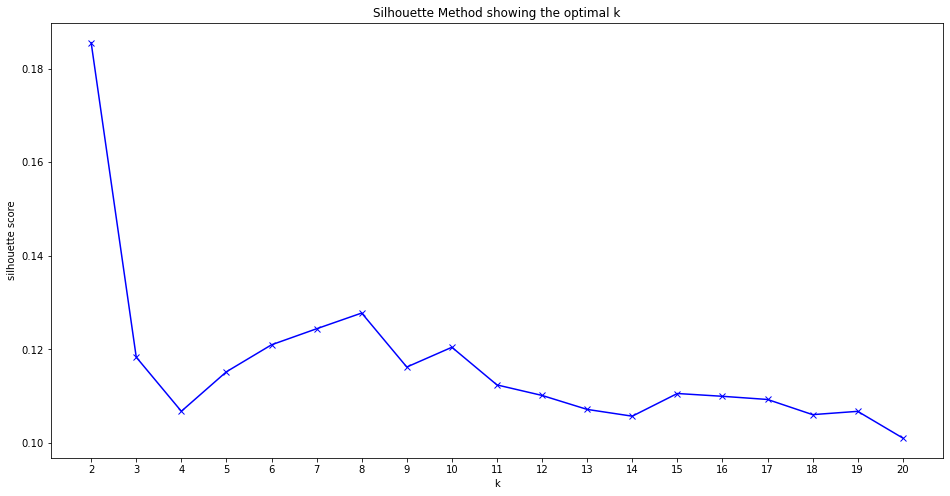

In [93]:

plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

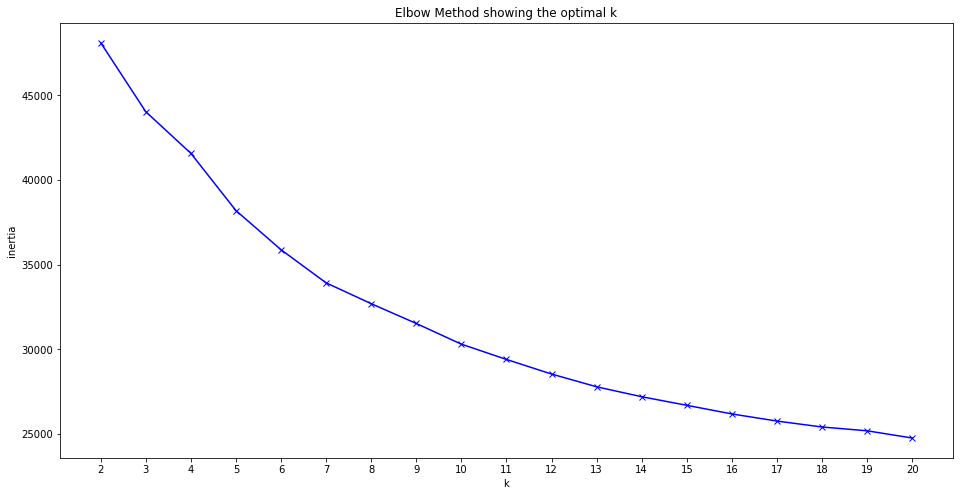

In [94]:
plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

## Objective 2

Save the freshly trained standard scaler with pickle

In [95]:
with open("../datasets/scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

with open("../datasets/kmeans_4.pickle", "wb") as f:
    pickle.dump(kmeans,f)

In [96]:
def load(filepath = "../data/kmeans.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
    except FileNotFoundError: 
        print("File not found!")

In [97]:
scaler2 = load("../datasets/scaler.pickle")
scaler2

KMeans(n_clusters=20, random_state=1234)

## Objective 3

Get the user’s song audio features

In [191]:
def user_song_audio_featuers(song_input):
    list_uris = []
    list_uris.append(get_uri_of_song(song_input))
    audio_features = get_audio_features_from_list_of_uris(list_uris)
    return audio_features

In [213]:
song_features = user_song_audio_featuers("Garden")
#x = get_audio_feature_items_into_seperate_lists(song_features)

#.drop(["type", "id", "uri", "track_href", "analysis_url", "time_signature"], axis=1, inplace=True)
#= song_features.drop(numerical.drop(["type", "id", "uri", "track_href", "analysis_url", "time_signature"], axis=1, inplace=True))

## Objective 4

Apply the trained scaler to transform the user’s song audio features

In [193]:
def get_artists_name_from_song(song_name):
    song_information = get_all_information_about_song(song_name)
    Artist_Names = song_information["tracks"]["items"][0]["artists"][0]["name"]
    return Artist_Names


In [214]:
song_features

[[{'danceability': 0.73,
   'energy': 0.457,
   'key': 9,
   'loudness': -7.26,
   'mode': 1,
   'speechiness': 0.283,
   'acousticness': 0.0705,
   'instrumentalness': 0,
   'liveness': 0.124,
   'valence': 0.549,
   'tempo': 111.352,
   'type': 'audio_features',
   'id': '19woxaSpjOefa2JnAOoqW5',
   'uri': 'spotify:track:19woxaSpjOefa2JnAOoqW5',
   'track_href': 'https://api.spotify.com/v1/tracks/19woxaSpjOefa2JnAOoqW5',
   'analysis_url': 'https://api.spotify.com/v1/audio-analysis/19woxaSpjOefa2JnAOoqW5',
   'duration_ms': 208400,
   'time_signature': 4}]]

In [227]:
song_name = input("Please input the song name: ")

Please input the song name: We will rock you


In [228]:
song_dict = {"Song_Name": [song_name], "Artist_Name": [get_artists_name_from_song(song_name)]}
song_df = pd.DataFrame(song_dict)
#song_df.columns
#scaler = StandardScaler()
kmeans = load("../Users/kubra/Desktop/Week3/Project-Week3-Spotify-ML/datasets/datasets/kmeans_4.pickle")
song_features_dict = { key: [value] for key, value in song_features[0][0].items() }
song_features_df = pd.DataFrame(song_features_dict)
#song_features_df
song_df = pd.concat([song_df,song_features_df], axis= 1)
#song_df.columns 
song_numerical = song_df[numerical3.columns]
song_scaled_numpy = scaler.transform(song_numerical)
song_scaled_df = pd.DataFrame(song_scaled_numpy, columns=numerical3.columns)
user_cluster = kmeans.predict(song_scaled_df)[0]
clusters = kmeans.predict(numerical_scaled3)
# top100
# spotify
# clusters 

data2['Cluster'] = clusters[0:data2.shape[0]]
data['Cluster']  = clusters[data2.shape[0]:]
#print(user_cluster)
#Search user song in hot100 dataframe which has the name data2. The search is base in song id
if ( song_df['id'].values in data2['id'].values ): # The song is in the hot100
    recomendation = data2[ data2['Cluster'] == user_cluster ].sample()
    print("May be you will like the song {} from artist {}".format(recomendation['Song_Names'].values[0],recomendation['Artist_Names'].values[0]))
else:
    recomendation = data[ data['Cluster'] == user_cluster ].sample()
    print("May be you will like the song {} from artist {}".format(recomendation['Song_Names'].values[0],recomendation['Artist_Names'].values[0]))

  

#song_scaled = scaler.transform(song_features)
#song_cluster = kmeans.predict(song_scaled)
#song_final_df = song_df
#song_final_df["Cluster"] = song_cluster

May be you will like the song I See You from artist MISSIO


## Objective 5

Create a function to fit  the K-Means clustering method using all the songs contained in the both datasets ( hot100 and spotify ).

In [200]:
numerical

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.762,0.701,8,-3.541,1,0.0286,0.23500,0.000158,0.1230,0.742,110.968,208867
1,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,203064
2,0.610,0.508,8,-6.682,0,0.1520,0.29700,0.000000,0.3840,0.758,178.818,137876
3,0.556,0.661,6,-5.052,0,0.2040,0.30000,0.000000,0.1010,0.668,168.560,178148
4,0.650,0.825,0,-4.645,1,0.0325,0.02150,0.000024,0.0936,0.593,118.091,191014
...,...,...,...,...,...,...,...,...,...,...,...,...
1281,0.407,0.725,5,-5.346,0,0.1880,0.01410,0.000002,0.3060,0.247,196.093,247267
1282,0.557,0.783,6,-4.893,0,0.2340,0.01710,0.017200,0.1510,0.442,177.008,255360
1283,0.666,0.677,2,-5.743,1,0.0326,0.21400,0.000000,0.0979,0.178,100.014,178242
1284,0.660,0.616,9,-4.753,1,0.0333,0.52300,0.000000,0.3910,0.536,138.942,160582


In [201]:
numerical2

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.759,0.459,8,-5.187,1,0.0948,0.00323,0.000000,0.0906,0.695,109.997,164442
1,0.556,0.661,6,-5.052,0,0.2040,0.30000,0.000000,0.1010,0.668,168.560,178148
2,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.915,102.977,203064
3,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,198082
4,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,242096
...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.659,0.683,3,-5.623,1,0.0312,0.51300,0.000005,0.1330,0.397,139.931,203373
96,0.467,0.481,2,-6.947,1,0.0255,0.22700,0.000189,0.1100,0.248,147.886,221240
97,0.612,0.884,5,-4.400,1,0.0459,0.00516,0.000000,0.0997,0.626,119.991,245626
98,0.795,0.599,6,-7.819,1,0.1230,0.04140,0.000000,0.1930,0.351,97.033,195454


In [217]:
numerical3 = pd.concat([numerical, numerical2])
scaler = StandardScaler()
scaler.fit(numerical3)
numerical_scaled3 = scaler.transform(numerical3)
numerical_scaled_df3 = pd.DataFrame(numerical_scaled3, columns = numerical3.columns)
display(numerical_scaled_df3.head())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.756616,0.040732,0.772240,0.867715,0.763984,-0.718898,0.205272,-0.200121,-0.402844,0.744580,-0.370877,-0.131495
1,0.313470,0.726580,0.218567,0.791369,-1.308927,-0.333545,-0.809465,-0.201487,-0.802029,1.507675,-0.675169,-0.250571
2,-0.366019,-1.026757,0.772240,-0.107093,-1.308927,0.790707,0.483442,-0.201487,1.471030,0.815155,2.212799,-1.588212
3,-0.764850,-0.180509,0.218567,0.398777,-1.308927,1.426846,0.496901,-0.201487,-0.560795,0.418169,1.822182,-0.761841
4,-0.070589,0.726580,-1.442449,0.525089,0.763984,-0.671187,-0.752620,-0.201276,-0.613924,0.087347,-0.099639,-0.497834


In [203]:
K = range(2, 21)
inertia = []
silhouette = []

for k in K:
    print("Training a K-Means model with {} neighbours! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,random_state=1234)
    kmeans.fit(numerical_scaled_df3)
    inertia.append(kmeans.inertia_)
    filename = "../datasets2/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    silhouette.append(silhouette_score(numerical_scaled_df3, kmeans.predict(numerical_scaled_df3)))

Training a K-Means model with 2 neighbours! 

Training a K-Means model with 3 neighbours! 

Training a K-Means model with 4 neighbours! 

Training a K-Means model with 5 neighbours! 

Training a K-Means model with 6 neighbours! 

Training a K-Means model with 7 neighbours! 

Training a K-Means model with 8 neighbours! 

Training a K-Means model with 9 neighbours! 

Training a K-Means model with 10 neighbours! 

Training a K-Means model with 11 neighbours! 

Training a K-Means model with 12 neighbours! 

Training a K-Means model with 13 neighbours! 

Training a K-Means model with 14 neighbours! 

Training a K-Means model with 15 neighbours! 

Training a K-Means model with 16 neighbours! 

Training a K-Means model with 17 neighbours! 

Training a K-Means model with 18 neighbours! 

Training a K-Means model with 19 neighbours! 

Training a K-Means model with 20 neighbours! 



## Remember to:

* Do some research on the optimal K-value for the K-means
* Save the final K-means model with pickle
* Use the trained K-means model to predict the cluster of each song in the internal databases and add this information to the internal databases

# Objective Day 4

## Importing Libraries

## Functions

## Objective 1

Create a function to ask the user:

Song title

Song artist


## Objective 2

Create a function to search the user song in the Spotify API to get the audio features

In [204]:
def song_input():
    song_input = input("Please enter a song name or artist name: ")
    return song_input

In [ ]:
#def song_input_regex(song_input):
    

## Objective 3

Create a function to retrieve the standard scaler previously saved and scales the song’s audio features

## Objective 4

Create a function to retrieve the K-Means model and predicts to which cluster belongs the song.


## Objective 5

Create a function to retrieve one/more songs at random from the internal database which belongs to the same cluster as the user’s song and it’s not the same as the user song.